# Combined Proteomic Comparison 


## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")

# used in pval_annotation
def get_pval_symbol(pval_df):
    if pval_df.iloc[0:,2].bool() == True:
        pval_symbol = '*'
    else:
        pval_symbol = 'ns'
    return pval_symbol

def pval_annotation(pval_df, plotted_df):
    # pval symbol
    num_pvals = len(pval_df)
    omics_col = plotted_df.columns[0]
    

    # annotation for Mutated and Wiltype
    if num_pvals == 1:
        mut_pval = pval_df.loc[pval_df.index == "Mutated/Wildtype"]
        mut_pval_symbol = get_pval_symbol(pval_df)
        
        x1, x2 = 0, 1   # columns (first column: 0, see plt.xticks())
        y, h = plotted_df[omics_col].max() + .05, .05     
        plt.plot([x1, x1, x2, x2], #draw horizontal line
                 [y, y+h, y+h, y], #vertical line
                 lw=1.5, color= '.3')
        plt.text((x1+x2)*.5, # half between x coord
                 y+h, mut_pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")
    
    # annotation for Missense, Truncation and Wildtype
    elif num_pvals == 2:
        # Missense
        miss_pval = pval_df.loc[pval_df.index == "Missense/Wildtype"]
        miss_pval_symbol = get_pval_symbol(miss_pval)
    
        x1, x2 = 0, 1   # columns (first column: 0, see plt.xticks())
        y, h = plotted_df[omics_col].max() + .05, .05     
        plt.plot([x1, x1, x2, x2], #draw horizontal line
                 [y, y+h, y+h, y], #vertical line
                 lw=1.5, color= '.3')
        plt.text((x1+x2)*.5, # half between x coord
                 y+h, miss_pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")
        
        # Truncation 
        trunc_pval = pval_df.loc[pval_df.index == "Truncation/Wildtype"]
        trunc_pval_symbol = get_pval_symbol(trunc_pval)
        
        x3, x4 = 0, 2   # columns (first column: 0, see plt.xticks())
        y2, h2 = plotted_df[omics_col].max() + .15, .05     
        plt.plot([x3, x3, x4, x4], #draw horizontal line
                 [y2, y2+h2, y2+h2, y2], #vertical line
                 lw=1.5, color= '.3')
        plt.text((x3+x4)*.5, # half between x coord
                 y2+h2, trunc_pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


## Step 2: Find the mutation frequency of the gene of interest

In [3]:
brain = cptac.Gbm()
desired_cutoff = 0.05
gene = 'RB1'

# Proteomics RB1 cis comparison

Proteomics: Mutated and Wildtype rb1

In [4]:
interacting_list = ['RNASEL', 'RPS6', 'COPS7A', 'NFKBIA', 'MAPK1', 'LPIN1', 'HRAS', 'AMBRA1', 'IGFBP3', 'HDAC1', 'DPF3', 'CASP9', 'APMAP', 'SP1', 'FHIT', 'WNT7B', 'CEBPD', 'ATG5', 'HBEGF', 'ZFP36', 'COL4A5', 'MAG', 'TLK2', 'IRS1', 'GABARAPL1', 'ATG12', 'IL3', 'PARP1', 'DDB2', 'ANAPC13', 'OMG', 'UBE2D2', 'BRCA2', 'TGFBR2', 'FASLG', 'LAMC3', 'UPK3A', 'TYMS', 'APEX1', 'PRKCD', 'GNAS', 'SMARCD3', 'PSMD12', 'FZD2', 'ING2', 'RBBP7', 'RASSF5', 'ITGB1', 'NOS2', 'ICAM1', 'PRKCZ', 'IFT122', 'CHK1', 'BAD', 'CREB3L4', 'STAT3', 'ORC3L', 'DGKE', 'RIPK2', 'PRMT2', 'STAT1', 'PSMD7', 'AXIN2', 'KCNIP3', 'IFT81', 'PIK3C2G', 'WEE1', 'LAMA1', 'E2F2', 'IGF1R', 'ARHGDIA', 'RARB', 'NOX4', 'MAP3K7', 'CSPG4', 'UBE2H', 'COX6C', 'CDH23', 'SMC3', 'CCNB1', 'MNAT1', 'WDR60', 'CREBBP', 'GLA', 'SMARCD1', 'SOCS3', 'EGF', 'GRIN1', 'GATA3', 'ANXA1', 'BARD1', 'TSC2', 'FADD', 'NEFL', 'GDNF', 'SH3GLB1', 'ANAPC4', 'IRS2', 'GSK3B', 'IQCB1', 'ARID1B', 'PSMD13', 'PTEN', 'NCOA1', 'LRP5', 'COL4A1', 'MAP1LC3C', 'LEP', 'CDK2', 'RXRA', 'CDC25B', 'UCP1', 'ANAPC5', 'FGF20', 'POLA1', 'MKS1', 'KLF7', 'PIK3CA', 'DNMT1', 'CXCL2', 'CBS', 'PLD1', 'MAPK3', 'FAF1', 'SMC2', 'PIDD', 'BCAN', 'LIF', 'PKMYT1', 'PIK3CG', 'GABARAP', 'CDT1', 'FUZ', 'ADFP', 'WNT4', 'FGF4', 'HIF1A', 'IGFBP7', 'VTN', 'RPA3', 'CEP170', 'TCF7L2', 'IFNB1', 'ANAPC2', 'BBS7', 'GRB2', 'DOCK5', 'CKS1B', 'RHOB', 'CNOT10', 'IL1A', 'PDK1', 'TFAP2A', 'NINL', 'IFT74', 'GNAI2', 'RXRG', 'XPNPEP3', 'CDC25C', 'CCNA1', 'MCM10', 'GNAI3', 'COL4A3', 'PBEF1', 'MAD2L2', 'UQCC1', 'SHC2', 'VEGFA', 'ASIP', 'LEF1', 'NR3C1', 'TRAF1', 'MET', 'ALK', 'TLR4', 'PIK3C3', 'LILRB3', 'ATR', 'MCM2', 'WNT10B', 'MEF2D', 'FGF2', 'WNT11', 'BIRC8', 'LIPE', 'ZBTB17', 'SQSTM1', 'SNRPB2', 'PLCB1', 'MBNL1', 'CDK5', 'WNT6', 'SRC', 'MAPK9', 'FGF10', 'PRKCI', 'HSPB1', 'PMAIP1', 'ANAPC7', 'SOCS1', 'FRZB', 'ROCK2', 'TTC26', 'CYP26A1', 'LPIN2', 'EIF5B', 'PSMC4', 'SLC39A2', 'MEF2A', 'SMARCA2', 'SKIP', 'TGFB2', 'CHST11', 'ORC2', 'NDN', 'CNOT6L', 'YPEL5', 'CLUAP1', 'MAP1LC3B', 'MAX', 'BUB1B-PAK6', 'CXCR2', 'SKP1', 'CCND3', 'CREBL1', 'IFI16', 'E2F1', 'NCOA2', 'PCNA', 'ACSL3', 'SCRIB', 'SPRY2', 'TFAP2B', 'TCTEX1D2', 'RPS6KB1', 'CSNK2B', 'AQP4', 'IL6', 'ORC1', 'TFAP2D', 'IFNG', 'RBL1', 'DLL1', 'ADIPOQ', 'MYT1', 'ARMC8', 'DLL3', 'LPIN3', 'CDKN1A', 'PPARA', 'ARAF', 'RRM1', 'RABIF', 'MAPK13', 'GLI4', 'ACAN', 'CDC45L', 'MRE11A', 'MLL', 'ADPN', 'SEMA6A', 'CREB1', 'CHUK', 'IRS4', 'FGF21', 'FRAT2', 'PGR', 'APC2', 'NOTCH3', 'EED', 'KLK8', 'RB1', 'H3F3B', 'YAP1', 'BBC3', 'CCNA2', 'CDK6', 'WNT16', 'RPGR', 'CREG1', 'AGT', 'DCAF7', 'BRAF', 'NFKB1', 'PSMD8', 'CALM1', 'PCK2', 'NR4A1', 'LRP6', 'CASP10', 'AGPAT2', 'MAPRE2', 'ING1', 'LAMB3', 'MAP2K4', 'ARID1A', 'FGF8', 'IL2', 'DAPK2', 'COPS6', 'TNFSF13B', 'IL1B', 'MRE11', 'FGFR1', 'ABL1', 'TTC30B', 'PEBP1', 'PTPRZ1', 'BTG2', 'PTK2', 'FZD5', 'YWHAZ', 'NTN1', 'IFT46', 'RPS6KB2', 'IGF1', 'EZH2', 'RHOC', 'PTCH1', 'DVL2', 'WEE2', 'GADD45G', 'MCM8', 'IL1R1', 'GNAQ', 'CXCL1', 'ANLN', 'CBX5', 'SNAP29', 'NUDC', 'STAG2', 'COL1A1', 'GID4', 'PDGFRA', 'PRIM1', 'TTK', 'SMO', 'CD47', 'RRM2', 'RMND5B', 'NOTCH4', 'PIK3CB', 'TRAF4', 'RGMA', 'GH1', 'FKBP8', 'ITGA2B', 'DNPEP', 'TRAF6', 'CCDC40', 'RELA', 'MCM3', 'BUB3', 'MAP3K1', 'COL4A4', 'CRABP1', 'FGF16', 'SCD', 'FOXO1', 'NPAT', 'IQGAP1', 'E2F4', 'CDC25A', 'IFT88', 'NEK8', 'ORC2L', 'MTA1', 'WNT5A', 'PTGS2', 'POLE2', 'PRLR', 'CBX3', 'TYMP', 'TRAF3', 'ITGA2', 'YWHAG', 'RAC2', 'RAD52', 'MAPK8', 'DYNLT1', 'IFT140', 'SMARCC1', 'CREB3L3', 'CHEK1', 'ATG16L1', 'SFN', 'EXOSC4', 'EGR2', 'TFAP2C', 'CDK4', 'SMAD2', 'FGF3', 'E2F3', 'AKT1', 'CDR2', 'MFAP1', 'WNT5B', 'ULK1', 'MAP1LC3A', 'CREB3', 'PPARD', 'PPARGC1A', 'STMN1', 'PIK3R2', 'PAK3', 'HEY2', 'TSC1', 'FKBP1A', 'STOM', 'GABARAPL2', 'FZD3', 'SMARCB1', 'SESN1', 'ARG1', 'IL6R', 'DCK', 'MAP2K2', 'CEBPB', 'POLE', 'WHRN', 'NDUFA5', 'DVL3', 'CDKN2A', 'RAP1B', 'RAB21', 'ITGA6', 'C1QB', 'ROS', 'HEY1', 'KLF15', 'MMP12', 'FOXO1A', 'MEF2C', 'COPS3', 'MED1', 'GADD45A', 'E2F5', 'TSHR', 'TNF', 'SPTAN1', 'FGF1', 'GAB1', 'PIK3C2A', 'CHK2', 'BCL2L1', 'ACTG1', 'EFHC2', 'TRAF5', 'NBN', 'GNAI1', 'LMNB1', 'ATRIP', 'STAG1', 'HMGA1', 'LAMB4', 'SREBF1', 'EXOC3', 'TP53AIP1', 'FLT4', 'CSNK1A1', 'SLC39A4', 'MYL6', 'IFT52', 'PLK1', 'RPA1', 'LAMA2', 'IFT172', 'RALA', 'TCF7', 'DPF1', 'MSK1', 'ARHGDIB', 'KIF4A', 'TSHB', 'PTTG2', 'C5', 'CASP3', 'AKT3', 'WNT3', 'UVRAG', 'SUV39H1', 'HTRA2', 'ARHGEF6', 'RNGTT', 'DBF4A', 'GNA12', 'SLIT2', 'CFLAR', 'JAG1', 'RHOA', 'TFDP2', 'LSM4', 'CUL1', 'PIK3R1', 'PIK3C2B', 'BIRC7', 'COPS4', 'NFKB2', 'BCL2', 'MCM5', 'CCDC6', 'TTC8', 'PRIM2A', 'ACTA1', 'GADD45B', 'DHFR', 'SMARCD2', 'MTOR', 'CCNB3', 'KDM1A', 'TP53', 'ERBB3', 'GLB1', 'NCOR1', 'HSPB11', 'YWHAB', 'SUZ12', 'LPL', 'GATA4', 'DCAF11', 'RALGDS', 'PRKCQ', 'ACTB', 'FGFR3', 'TGFA', 'SSNA1', 'CDKN2D', 'SOX9', 'LAMB2', 'MKLN1', 'IL8', 'SMC4', 'MSH2', 'POM121', 'NR2F1', 'EPAS1', 'MYC', 'RMND5A', 'RPS6KA1', 'RBP1', 'LAMC1', 'BBS1', 'AAR2', 'BMP2', 'CXCL10', 'ZYG11B', 'TRAF3IP1', 'SHC3', 'NUP88', 'NFKBIB', 'DYNLRB2', 'CSNK2A2', 'PAK4', 'KIAA0652', 'EXOC6', 'PLCG2', 'COPS8', 'HES5', 'MBD3', 'CD2BP2', 'LAMP2', 'RHBDD2', 'FZD6', 'RBX1', 'INS', 'NUP133', 'TGFB1', 'CCNG2', 'PRKCG', 'RALB', 'ANAPC1', 'ESPL1', 'JAK1', 'AKT1S1', 'PSMC6', 'RAB14', 'EXOC7', 'IRF5', 'IL4', 'RAB3IL1', 'CSNK1A1L', 'CDK8', 'CDK7', 'TGFBR1', 'PAK2', 'MDM4', 'TIAM1', 'CASP6', 'ACTL6B', 'BBS4', 'LZTFL1', 'TNKS1BP1', 'CCND1', 'FGFR2', 'YWHAH', 'RASSF1', 'RAD50', 'CDKN2B', 'DUSP6', 'DYNC1LI1', 'GDF10', 'IKBKG', 'DYNLT3', 'FGF23', 'HES1', 'MAP2K7', 'CCNE2', 'MAP2K5', 'NME8', 'FRAT1', 'FZD7', 'CCND2', 'MYL12B', 'INHBA', 'CEBPA', 'XYLT1', 'RFC4', 'APC', 'RB1CC1', 'GLI1', 'EHBP1', 'RANBP10', 'WDR26', 'H2AFZ', 'TNFSF13', 'KLF6', 'TNFRSF10B', 'RALBP1', 'SPOCK', 'CCNH', 'ANKS3', 'FGF19', 'EBF', 'C10orf70', 'H3F3A', 'AHR', 'FOXC2', 'FZR1', 'YWHAE', 'RTN4', 'SOS1', 'TGFB3', 'EXOC1', 'FZD4', 'INTU', 'ADCY2', 'COL3A1', 'AIMP1', 'PLA2G6', 'FGF5', 'WNT7A', 'BECN1', 'AQP1', 'FGF18', 'WNT1', 'CDK1', 'ACTL6A', 'RFC5', 'CASP8', 'EGFR', 'RARA', 'PLA2G2A', 'DLL4', 'ESR2', 'JAK3', 'GLI2', 'DPF2', 'TTC30A', 'RAD9A', 'EFTUD2', 'YWHAQ', 'BUB1', 'MMP14', 'IGFBP5', 'GTF3A', 'JUN', 'APAF1', 'GJA1', 'PRB1', 'COL4A6', 'BMP3', 'MAP2K6', 'THBS1', 'PAK5', 'ATG7', 'NEK7', 'FOXO3', 'NOTCH2', 'H2AFX', 'FGF9', 'RAD1', 'CCR2', 'SELP', 'FGF6', 'SPATA7', 'CSNK2A1', 'SERPINE1', 'BIRC2', 'TWIST1', 'COPS7B', 'FGF22', 'SAP30', 'SPARC', 'LAMA5', 'MYL6B', 'FANCD2', 'AXIN1', 'IFT22', 'NGFR', 'TOP2A', 'CDC16', 'WNT3A', 'MSH6', 'WNT10A', 'PLAT', 'NR1H3', 'PLIN', 'GNG2', 'RRM2B', 'TLK1', 'RAB2A', 'WNK1', 'MIXL1', 'PRKCA', 'MMP1', 'ARL8B', 'LCA5', 'SOS2', 'GNB1', 'STAT5A', 'ID3', 'LAMP1', 'PPP3CA', 'GNAO1', 'ESR1', 'PTTG1', 'CSNK2A3', 'RAP1A', 'BDNF', 'CDC27', 'PIK3CD', 'IKBKB', 'CCNB2', 'DAPK1', 'SLIT3', 'HMGB1', 'PLK4', 'MAPK10', 'LAMA4', 'HUS1', 'FOS', 'FZD8', 'IL6ST', 'DF', 'EP300', 'GNA13', 'PDPK1', 'PTPRA', 'CDC6', 'AIF1', 'RIPK4', 'RANBP9', 'LIFR', 'SMAD4', 'TFAP2E', 'GDI1', 'STAT2', 'CDC23', 'EHD3', 'PLAU', 'MTA2', 'CCL2', 'CYP26B1', 'VPS4A', 'FANCG', 'ECHS1', 'RETN', 'RAC1', 'TMED1', 'LAMB1', 'BAK1', 'ATG10', 'IRF1', 'IQGAP2', 'MAEA', 'BBIP1', 'EXOC5', 'TCEB2', 'HMGB2', 'RSL1D1', 'PDE4D', 'RBBP4', 'EXOSC9', 'TNFSF11', 'CDKN2C', 'CBL', 'VAPB', 'GSN', 'NRIP1', 'MCM7', 'CDC7', 'GFAP', 'TCF7L1', 'PCK1', 'BRCA1', 'RAF1', 'LCN2', 'EPHA4', 'CCNG1', 'LTB', 'PLXNA2', 'MTA3', 'PAK1', 'DYNLRB1', 'MIF', 'EXOSC7', 'DVL1', 'SMARCE1', 'CXCL8', 'RAD21', 'LGALS3', 'CBX1', 'FGF17', 'ORC3', 'DAXX', 'CNTFR', 'EXOC6B', 'ITGAV', 'FN1', 'CRABP2', 'ATG14', 'DLK1', 'TIPRL', 'COL10A1', 'CDKN1C', 'DYNLL2', 'CTBP2', 'BSCL2', 'CKS2', 'MMP9', 'SLC39A1', 'NOS1', 'SLC2A4', 'MDM2', 'ERRFI1', 'CTNNB1', 'CDC42', 'PLA2G5', 'ORC5L', 'PTGIS', 'RBL2', 'STK4', 'ORC1L', 'BMP1', 'IFT20', 'BBS2', 'DFFB', 'ADCY3', 'FZD9', 'SKP2', 'ARFGAP3', 'NOTCH1', 'OSM', 'CTSA', 'P53', 'LRPPRC', 'RBM14', 'CDC20', 'SERPINB2', 'IFT57', 'BIRC3', 'TULP3', 'CNOT1', 'SMC1A', 'TBC1D4', 'COPS2', 'PLCG1', 'EXOC4', 'NRAS', 'BBS9', 'FCGR2A', 'PGRMC2', 'COPS5', 'VIM', 'MAP2K1', 'CREB3L1', 'SMAD3', 'CUGBP1', 'RAC3', 'CDKN1B', 'CDH1', 'CGA', 'EXOSC2', 'WDR34', 'FOXO4', 'RAP1GAP', 'ORC4', 'LMNA', 'EGR1', 'CCL3', 'NCOR2', 'CSRP2', 'MAP2K3', 'LAMC2', 'TACR1', 'FZD10', 'PDGFRB', 'NDUFA9', 'BAX', 'GLI3', 'PIK3R3', 'POLK', 'KLF5', 'WWTR1', 'COL2A1', 'IFT43', 'ITGA3', 'CXCL14', 'DDIT3', 'GATA2', 'CCNE1', 'FGF7', 'ERF', 'HLTF', 'PRKDC', 'SOX4', 'COPS1', 'CHEK2', 'NF1', 'HEYL', 'TCF1', 'ANKS6', 'ANAPC11', 'CETN3', 'PRKCH', 'BID', 'TSSC1', 'RTN4R', 'MAD1L1', 'CHD4', 'SHC1', 'DAPK3', 'COL4A2', 'JAG2', 'EXOC8', 'FAS', 'DFFA', 'DYNC1H1', 'ERBB2', 'EML4', 'JAK2', 'WNT2B', 'CHD3', 'BMI1', 'ZMPSTE24', 'MCM6', 'NCOA3', 'MCM4', 'CDC45', 'MCM9', 'SHC4', 'MAPKAPK3', 'LAMA3', 'SLIT1', 'ATG3', 'STAT5B', 'CDC2', 'ORC6', 'TRAF2', 'TRIB3', 'SFRP4', 'FZD1', 'RORA', 'KIT', 'SMARCA4', 'RAD17', 'IQGAP3', 'CASP7', 'IL24', 'DDX5', 'DYNLL1', 'ORC4L', 'FRAP1', 'CAMK2A', 'MAPKAPK2', 'BMP4', 'GAP43', 'GID8', 'PML', 'PAK6', 'WNT2', 'MBP', 'IFT27', 'CYCS', 'CD44', 'PPARG', 'TNFSF15', 'BBS5', 'TFDP1', 'RAB8A', 'USH1C', 'PDYN', 'KRAS', 'POLD3', 'AFG3L2', 'AKT2', 'RFC3', 'ORC5', 'PRKCB', 'RABEP2', 'IFT80', 'ANAPC10', 'POLA2', 'VCAN', 'LMNB2', 'IRF7', 'ORC6L', 'NEFM', 'RAD51', 'ATM', 'DYNC1I2', 'MEF2B', 'NCAN', 'RXRB', 'CEP97', 'EXOC2', 'CEP290', 'LTB4R', 'SMC1B', 'MAPK14', 'MBD2', 'ZMYND19', 'SIN3A', 'RPA2', 'HDAC2', 'MMP2', 'PAFAH1B1', 'SLC39A3', 'SMARCC2', 'STAT6', 'GBL']

len(interacting_list)

1041

In [5]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest  
prot_and_mutations = brain.join_omics_to_mutations(
    mutations_genes = ['RB1'], omics_df_name = 'proteomics', omics_genes = interacting_list) 
prot_and_mut = prot_and_mutations.dropna(how='all',axis=1)
print(len(prot_and_mut.columns)-4, "of the", len(prot_and_mutations.columns)-4, 
      "genes from the interacting list have proteomics data.")

774 of the 1041 genes from the interacting list have proteomics data.


In [6]:
# Step 2 - Create binary column 
prot_and_mut['RB1_binary_mutations'] = np.where(
            prot_and_mut['RB1_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mut[prot_and_mut.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = ["RB1_Mutation", "RB1_Location", "RB1_Mutation_Status", "Sample_Status"]
RB1_mut_status = tumors.drop(columns_to_drop, axis = 1)
RB1_mut_status = RB1_mut_status.dropna(axis=1,how='all')

C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
RB1_mut_status

Name,RNASEL_proteomics,RPS6_proteomics,COPS7A_proteomics,NFKBIA_proteomics,MAPK1_proteomics,LPIN1_proteomics,HRAS_proteomics,AMBRA1_proteomics,IGFBP3_proteomics,HDAC1_proteomics,...,MAPK14_proteomics,MBD2_proteomics,SIN3A_proteomics,RPA2_proteomics,HDAC2_proteomics,MMP2_proteomics,PAFAH1B1_proteomics,SMARCC2_proteomics,STAT6_proteomics,RB1_binary_mutations
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,-0.074682,-0.298868,-0.375332,0.430818,0.364629,0.593744,-0.005871,0.013390,1.187890,0.156024,...,0.059122,0.086119,0.036935,0.155935,0.119510,-0.154579,-0.111372,0.281121,-0.580490,Mutated
S002,0.354429,-0.149719,-0.214671,0.202222,0.419605,-0.900685,-0.242413,0.114986,1.089068,0.208120,...,0.248486,0.177578,0.153798,0.327944,-0.002000,0.236139,0.026597,-0.090254,-0.532108,Mutated
S003,-0.006295,0.458307,-0.092492,0.006309,-0.369258,0.197488,-0.100306,0.608246,0.288977,-0.493526,...,0.131765,0.217612,-0.117634,-0.178608,0.104724,-0.190389,-0.124933,-0.254752,0.283337,Wildtype
S004,0.200944,-0.320724,0.406828,-0.514395,-0.090202,0.560842,0.450479,0.468160,-0.842326,-0.302168,...,-0.158649,-0.003504,0.142193,0.332077,-0.007612,-0.537830,0.138830,-0.410945,-0.194730,Mutated
S005,-0.026010,0.239727,-0.172056,-0.373507,-0.919902,-0.195571,0.135963,0.175601,-0.480078,0.120492,...,-0.345273,-0.096198,-0.154285,-0.144604,0.097894,1.254198,-0.184890,0.447387,-0.038862,Wildtype
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S100,0.991301,-0.098582,0.125135,0.097418,0.382110,0.046771,-0.906531,0.086460,0.790289,1.068121,...,0.348674,0.602169,0.571138,0.463434,0.272694,1.095257,-0.208197,0.435165,0.363866,Wildtype
S101,-0.236228,-0.133548,-0.343473,-0.280943,-0.337446,-0.406649,-0.686651,0.528189,-0.339737,0.544661,...,-0.025603,0.171727,0.587882,0.468716,0.914054,0.119959,-0.269277,0.773308,-0.620584,Wildtype
S102,-0.308096,0.432225,-0.010452,0.042622,0.088424,-0.071187,0.396887,-0.047656,0.576165,-0.384968,...,-0.164853,-0.286700,-0.275250,-0.580135,-0.171912,0.768317,-0.006391,-0.471101,0.049946,Wildtype


In [30]:
col_list = list(RB1_mut_status.columns)
col_list.remove('RB1_binary_mutations')

print("Doing t-test comparisons\n")

# Call wrap_ttest, pass in formatted dataframe
wrap_results = u.wrap_ttest(RB1_mut_status, 'RB1_binary_mutations', col_list)
wrap_results_all = u.wrap_ttest(RB1_mut_status, 'RB1_binary_mutations', col_list, return_all=True)

Doing t-test comparisons

6 significant comparisons!
6 significant comparisons!


In [32]:
wrap_results

,Comparison,P_Value
0,RB1_proteomics,1.139144e-08
1,CDK2_proteomics,5.174663e-06
2,PTK2_proteomics,7.166146e-06
3,CDK6_proteomics,1.256368e-05
4,HSPB11_proteomics,1.865781e-05
5,NOTCH1_proteomics,1.960593e-05


# Visualize 

In [33]:
prot_list = list(wrap_results['Comparison'])

prot_long = pd.melt(RB1_mut_status, id_vars = 'RB1_binary_mutations', 
            value_vars = prot_list, value_name = 'Proteomics')
prot_long.replace(to_replace = '_proteomics', value = '', 
                        inplace = True, regex = True) # shorten column names

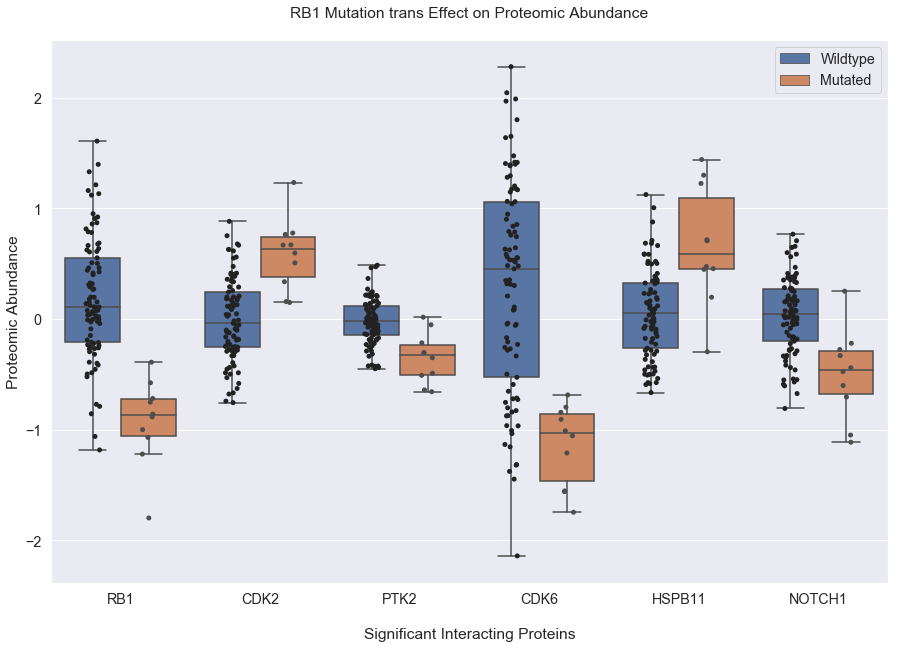

In [29]:
# Visualize 
plt.rcParams['figure.figsize']=(15,10)#size of plot
sns.set(font_scale = 1.3)

boxplot = sns.boxplot(x='Name', y="Proteomics", hue = 'RB1_binary_mutations', 
                      hue_order = ['Wildtype', 'Mutated'],
                      data = prot_long, showfliers = False)    
boxplot.set_title("RB1 Mutation trans Effect on Proteomic Abundance\n")
boxplot = sns.stripplot(x='Name', y="Proteomics", 
                        hue = 'RB1_binary_mutations', data = prot_long, jitter = True, 
                        color = ".3",dodge = True, hue_order = ['Wildtype', 'Mutated'])
boxplot.set(xlabel = "\nSignificant Interacting Proteins", ylabel = 'Proteomic Abundance')

boxplot.set_xticklabels(boxplot.get_xticklabels())

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2])

plt.show()
plt.clf()
plt.close()

# Phosphoproteomics

In [40]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest  
phos_and_mutations = brain.join_omics_to_mutations(
    mutations_genes = ['RB1'], omics_df_name = 'phosphoproteomics', omics_genes = interacting_list) 
phos_and_mut = phos_and_mutations.dropna(how='all',axis=1)
phos_and_mut = brain.reduce_multiindex(phos_and_mut, levels_to_drop=['Database_ID'], flatten=True)
print(len(phos_and_mut.columns)-4, "of the", len(phos_and_mutations.columns)-4, 
      "phosphosites from the interacting genes list have phosphoproteomics data.")

8451 of the 8870 phosphosites from the interacting genes list have phosphoproteomics data.


In [58]:
# Step 2 - Create binary column 
phos_and_mut['RB1_binary_mutations'] = np.where(
            phos_and_mut['RB1_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = phos_and_mut[phos_and_mut.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = ["RB1_Mutation", "RB1_Location", "RB1_Mutation_Status", "Sample_Status"]
phos_RB1 = tumors.drop(columns_to_drop, axis = 1)

In [50]:
phos_col_list = list(phos_RB1.columns)
phos_col_list.remove('RB1_binary_mutations')

print("Doing t-test comparisons\n")

# Call wrap_ttest, pass in formatted dataframe
phos_wrap_results = u.wrap_ttest(phos_RB1, 'RB1_binary_mutations', phos_col_list)
phos_wrap_results

Doing t-test comparisons

4 significant comparisons!


In [57]:
# Create data frame with all significant phospho sites in order to graph
phospho_list = list(phos_wrap_results['Comparison']) 

phospho_df_RB1 = pd.melt(phos_RB1, id_vars = 'RB1_binary_mutations', 
            value_vars = phospho_list, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
phospho_df_RB1.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names
phospho_df_RB1.replace(to_replace = '_[A-Z]*\*[A-Z]*\*?[A-Z]*\*?[A-Z]*', value = '', 
                        inplace = True, regex = True)


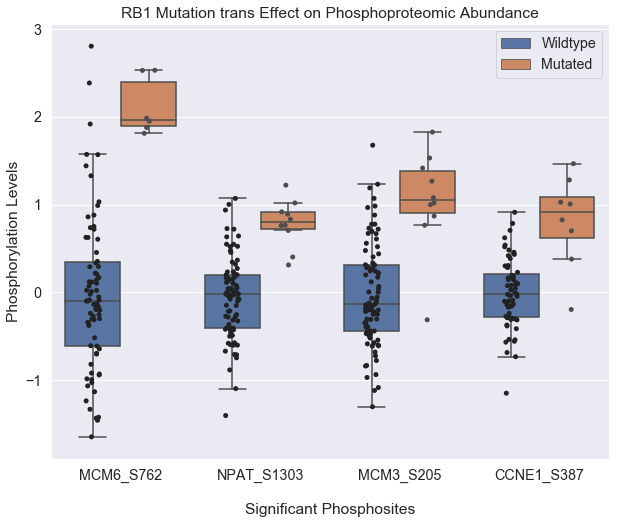

In [56]:
# Visualize 
plt.rcParams['figure.figsize']=(10,8)#size of plot
sns.set(font_scale = 1.3)

boxplot = sns.boxplot(x='specific_phospho', y="phosphoproteomics", hue = 'RB1_binary_mutations', 
                          hue_order = ['Wildtype', 'Mutated'],
                          data = phospho_df_RB1, showfliers = False)    
boxplot.set_title("RB1 Mutation trans Effect on Phosphoproteomic Abundance")
boxplot = sns.stripplot(x='specific_phospho', y="phosphoproteomics", hue = 'RB1_binary_mutations', data = phospho_df_RB1, jitter = True, 
                           color = ".3",dodge = True, hue_order = ['Wildtype', 'Mutated'])
boxplot.set(xlabel = "\nSignificant Phosphosites", ylabel = 'Phosphorylation Levels')

boxplot.set_xticklabels(boxplot.get_xticklabels())

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2])

plt.show()
plt.clf()
plt.close()